In [1]:
import matplotlib as plt
import numpy as np 
import pandas as pd
import os
import sys

# Setup paths
PROJECT_ROOT = os.path.dirname(os.getcwd())
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

FEAT_IMP_PATH = '../results_modelling_feat_imp'
    
import pandas as pd
import numpy as np
import logging

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

In [2]:
def get_feat_imp(folder_path): 
    dfs = []
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, index_col=0)  
        dfs.append(df)  

    combined_df = pd.concat(dfs, axis=0, ignore_index=True)
    return combined_df

In [3]:
df_imps = get_feat_imp(FEAT_IMP_PATH)
df_imps = 
df_imps_intersection = df_imps[df_imps['dataset'] == 'Intersection']
df_imps_pData_intersection = df_imps[df_imps['dataset'] == 'pData_Intersection']
df_imps_pData = df_imps[df_imps['dataset'] == 'pData']
df_imps_pData

SyntaxError: invalid syntax (2036628878.py, line 2)

In [ ]:
pts_ffpe = pd.read_csv('ProstaTrend_paper.csv', sep=";")  
pts_ffpe = pts_ffpe[pts_ffpe['Signature'] == 'ProstaTrend-ffpe']
pts_ffpe_genes = pts_ffpe['Ensembl_ID']

In [ ]:
grouped_intersection = df_imps_intersection.groupby('feature').size().reset_index(name='count')

df_imps_pData_intersection['rank'] = df_imps_pData_intersection.groupby('model_class')['value'].rank(method='dense', ascending=False).astype(int)
df_imps_pData_intersection = df_imps_pData_intersection.sort_values(by=['model_class', 'value'], ascending=[False, False])
grouped_intersection_pData = df_imps_pData_intersection.groupby('feature').agg(
    count=('rank', 'count'),
        highest_rank=('rank', 'min'),
        lowest_rank=('rank', 'max')
).reset_index()

df_imps_pData['rank'] = df_imps_pData.groupby('model_class')['value'].rank(method='dense', ascending=False).astype(int)
df_imps_pData = df_imps_pData.sort_values(by=['model_class', 'value'], ascending=[False, False])
grouped_pData = df_imps_pData.groupby('feature').agg(
    count=('rank', 'count'),
        highest_rank=('rank', 'min'),
        lowest_rank=('rank', 'max')
).reset_index()

C:\Users\laeti\AppData\Local\Temp\ipykernel_12848\2868273724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imps_pData_intersection['rank'] = df_imps_pData_intersection.groupby('model_class')['value'].rank(method='dense', ascending=False).astype(int)


In [ ]:
df_imps_pData

,feature,value,model_class,dataset,rank
2918,GLEASON_SCORE,0.122436,RSF,pData,1
2919,PRE_OPERATIVE_PSA,0.021971,RSF,pData,2
2917,TISSUE,0.016301,RSF,pData,3
2916,AGE,0.000110,RSF,pData,4
425,GLEASON_SCORE,70.590153,GBoost,pData,1
426,TISSUE,18.635959,GBoost,pData,2
427,PRE_OPERATIVE_PSA,8.195472,GBoost,pData,3
428,AGE,2.578415,GBoost,pData,4
813,GLEASON_SCORE,0.538171,CoxPH,pData,1
816,TISSUE.Snap_frozen,0.434701,CoxPH,pData,2


In [ ]:
grouped_intersection

,feature,count
0,ENSG00000002016,1
1,ENSG00000004468,2
2,ENSG00000004478,1
3,ENSG00000004487,1
4,ENSG00000006016,1
...,...,...
1063,ENSG00000258947,1
1064,ENSG00000266964,1
1065,ENSG00000270765,1
1066,ENSG00000273045,1


In [ ]:
inter_restr = grouped_intersection[grouped_intersection['count'] >1]

In [ ]:
overlap_pts_ffpe = grouped_intersection[grouped_intersection['feature'].isin(pts_ffpe_genes)]
overlap_pts_ffpe

,feature,count
59,ENSG00000068654,1
98,ENSG00000087116,1
102,ENSG00000088325,3
210,ENSG00000108821,1
225,ENSG00000111206,1
258,ENSG00000113448,2
261,ENSG00000113739,1
291,ENSG00000117399,1
314,ENSG00000120915,1
476,ENSG00000137809,1


In [ ]:
grouped_pData[grouped_pData['count'] >1].sort_values(by = ["count", "highest_rank"], ascending=[False, True])

,feature,count,highest_rank,lowest_rank
1,GLEASON_SCORE,3,1,1
2,PRE_OPERATIVE_PSA,3,2,3
3,TISSUE,2,2,3
0,AGE,2,4,4


In [ ]:
grouped_intersection_pData[grouped_intersection_pData['count'] >1])

48

In [ ]:
grouped_intersection_pData

,feature,count,highest_rank,lowest_rank
0,ENSG00000004660,1,170,170
1,ENSG00000004846,1,153,153
2,ENSG00000004975,1,202,202
3,ENSG00000005007,1,194,194
4,ENSG00000005100,1,170,170
...,...,...,...,...
1310,ENSG00000267680,1,177,177
1311,ENSG00000277258,1,174,174
1312,ENSG00000277443,1,186,186
1313,GLEASON_SCORE,2,1,2


In [ ]:
inter_pdata_restr = grouped_intersection_pData[grouped_intersection_pData['count'] >1]

In [ ]:
# Overlap intersection and intersection_pdata genes
intersection = list(set(grouped_intersection_pData['feature']) & set(grouped_intersection['feature']))
len(intersection)


170

In [ ]:
intersection_restr = list(set(inter_pdata_restr['feature'])& set(inter_restr['feature']))
intersection_restr

['ENSG00000136100',
 'ENSG00000138356',
 'ENSG00000078098',
 'ENSG00000113448',
 'ENSG00000087586',
 'ENSG00000145721',
 'ENSG00000088325',
 'ENSG00000122641']

In [ ]:
intersection_genes = pd.read_csv("../data/merged_data/exprs/intersection/exprs_intersect.csv", index_col = 0)

In [ ]:
filtered_inter = intersection_genes[intersection_genes.columns.intersection(intersection)]
filtered_inter

,ENSG00000006282,ENSG00000013588,ENSG00000024862,ENSG00000027869,ENSG00000029153,ENSG00000038002,ENSG00000042753,ENSG00000050555,ENSG00000057294,ENSG00000067955,...,ENSG00000189079,ENSG00000196182,ENSG00000198270,ENSG00000198680,ENSG00000198964,ENSG00000204439,ENSG00000239306,ENSG00000239900,ENSG00000242173,ENSG00000258947
Atlanta_2014_Long.PT081,-1.308105,-0.519261,-2.410445,-0.776375,0.228222,-2.177874,1.030929,-1.899276,1.991166,1.863251,...,0.969004,-1.272803,1.621361,-2.958232,2.348617,-0.220584,-1.143756,0.732417,0.035461,-0.358418
Atlanta_2014_Long.PT127,0.907237,-0.590197,0.251143,-2.279213,-0.772678,0.417670,-0.250234,0.548768,0.697337,1.610459,...,0.409301,-0.730338,0.514234,-0.190001,1.296193,-0.220584,1.066879,0.382703,1.129106,-1.079883
Atlanta_2014_Long.PT168,0.436359,-0.299991,-0.584634,0.892863,0.199535,-0.168942,-0.243627,-0.364800,1.295149,0.963079,...,-0.053486,0.521405,-1.020147,-0.135513,1.237129,-0.220584,0.266332,-0.175269,-0.905493,-1.079883
Atlanta_2014_Long.PT184,0.871094,0.053875,1.121688,0.557985,0.534663,1.310745,0.467294,1.145142,-0.081661,0.906366,...,0.052332,-0.719367,-0.416667,0.339427,1.583442,-0.220584,-0.783213,0.124558,0.579988,0.689678
Atlanta_2014_Long.PT199,0.497920,-0.035057,0.981316,-2.279213,-0.571495,0.301230,-0.175013,0.480801,0.107082,1.210767,...,-0.013490,0.074608,-0.446218,0.792817,1.582478,-0.220584,0.067820,-0.039594,-0.905493,-1.079883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stockholm_2016_Ross_Adams.STKHLM8462,0.326723,1.558441,-0.304517,1.544701,-1.316482,0.630253,-0.047144,-0.043949,1.386618,0.142290,...,0.361066,0.563442,-0.474831,0.331767,-0.894259,0.975005,-0.123452,-0.240024,-0.948810,0.109672
Stockholm_2016_Ross_Adams.STKHLM8659,0.689505,-0.849800,-1.790453,-0.820672,2.180193,-0.706719,-1.905476,1.051071,-1.851331,1.529703,...,0.697362,0.999762,-0.702234,0.515636,0.124231,-0.009210,1.577578,-0.807464,1.650624,2.881147
Stockholm_2016_Ross_Adams.STKHLM9157,0.627466,0.299360,-0.239145,-0.834199,0.294633,1.518832,1.921940,0.328579,0.177391,0.215422,...,-0.046961,0.763788,-0.898172,-0.015497,0.994428,0.547187,0.199971,0.125955,0.598544,-0.129757
Stockholm_2016_Ross_Adams.STKHLM9161,-0.210341,0.194851,0.076746,-0.676990,0.633686,0.711631,1.550747,-0.373626,0.984245,0.347086,...,0.643962,0.046736,0.665488,2.031656,0.519421,-0.098451,-0.073299,-0.862172,-0.089505,-0.588687


In [ ]:
filtered_inter_restr = intersection_genes[intersection_genes.columns.intersection(intersection_restr)]
filtered_inter_restr

,ENSG00000078098,ENSG00000087586,ENSG00000088325,ENSG00000113448,ENSG00000122641,ENSG00000136100,ENSG00000138356,ENSG00000145721
Atlanta_2014_Long.PT081,-0.151563,3.153003,3.854945,-3.938984,-2.756720,0.531102,-1.447139,-1.407493
Atlanta_2014_Long.PT127,-2.093049,0.450269,1.498175,0.636040,-0.612266,0.922253,-0.890472,1.291480
Atlanta_2014_Long.PT168,-0.166197,-1.334055,-1.485621,0.625267,-1.412540,0.160304,0.354575,1.344604
Atlanta_2014_Long.PT184,0.508764,-0.031303,0.940334,0.006830,0.946424,0.179852,-0.318711,0.836251
Atlanta_2014_Long.PT199,-0.107688,1.130447,-0.000585,-0.146163,0.903514,0.347866,-0.256042,0.267748
...,...,...,...,...,...,...,...,...
Stockholm_2016_Ross_Adams.STKHLM8462,0.288509,-0.838527,-1.679012,0.373547,0.901585,0.626359,1.453059,1.026754
Stockholm_2016_Ross_Adams.STKHLM8659,-0.040567,-0.459546,-0.862653,0.069432,1.665089,0.450161,0.771306,-0.175531
Stockholm_2016_Ross_Adams.STKHLM9157,-1.012104,1.599064,1.057249,0.133674,2.600506,-1.935760,-0.643439,0.029118
Stockholm_2016_Ross_Adams.STKHLM9161,-1.150209,1.159281,1.489290,1.822061,2.040429,0.387916,-0.867439,-0.780319


KeyboardInterrupt: 

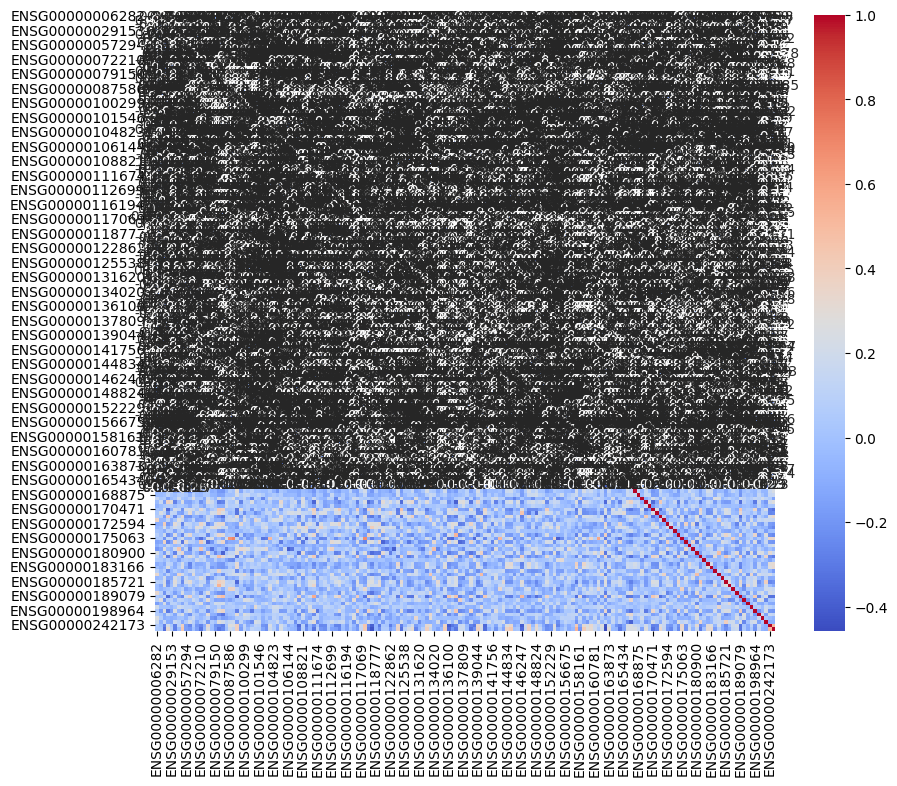

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = filtered_inter.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0)
plt.title('Correlation Heatmap')
plt.show()
